# Trimester-specific cis-e/sQTL

In [1]:
library(tidyverse)
library(data.table)
library(VennDiagram)
library(ggsignif)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

Loading required package: futile.logger



### 1: HCP titration

In [11]:
results <- read.csv("../data/eur/chuanjiao/hcps-plots.csv")

In [12]:
colnames(results)[3] <- "Group"
results[1:10,3] <- "EUR trimester 1, n=137"
results[11:20,3] <- "EUR trimester 2, n=141"

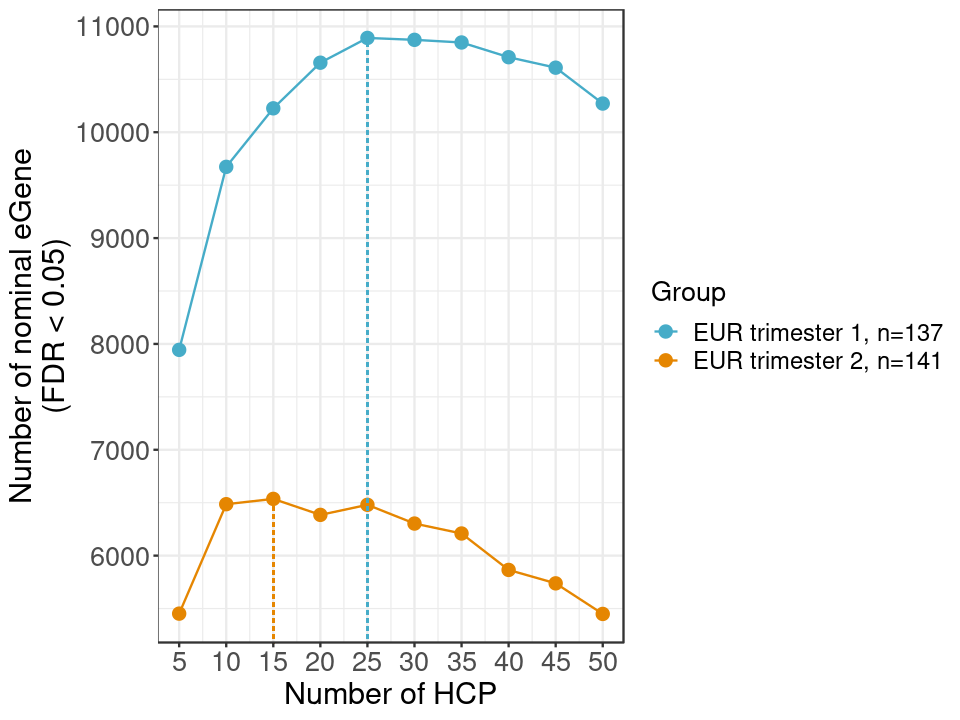

In [13]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(results, aes(x = X, y = value, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 15, y = 0, xend = 15, yend = 6536, color = "#E58601", linetype = "dashed") +
    geom_segment(x = 25, y = 0, xend = 25, yend = 10891, color = "#46ACC8", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of nominal eGene\n(FDR < 0.05)") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#46ACC8", "#E58601"))

In [14]:
ggsave("../figures/tri_nominal.pdf", width = 8, height = 6)

In [7]:
df_1 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_1[i/5, "Count"] <- read.table(paste0("../../sqtl_new/results/tri1_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}
df_2 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_2[i/5, "Count"] <- read.table(paste0("../../sqtl_new/results/tri2_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [8]:
df <- rbind(df_1, df_2)
df$Group <- c(rep("EUR trimester 1, n=141", 10), rep("EUR trimester 2, n=143", 10))

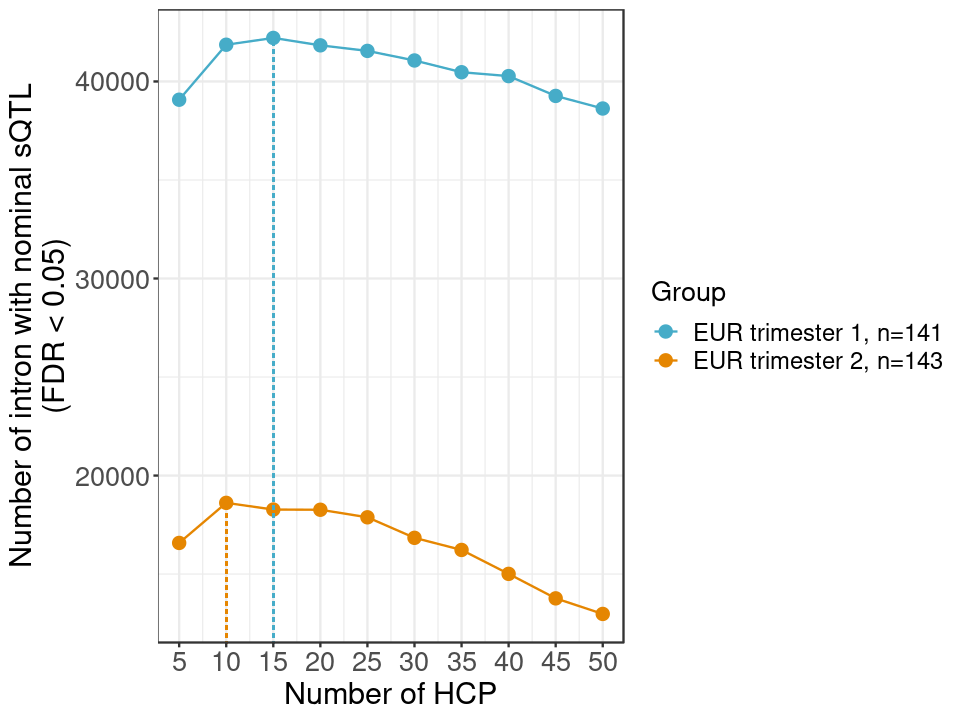

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 15, y = 0, xend = 15, yend = 42210, color = "#46ACC8", linetype = "dashed") +
    geom_segment(x = 10, y = 0, xend = 10, yend = 18614, color = "#E58601", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of intron with nominal sQTL\n(FDR < 0.05)") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#46ACC8", "#E58601"))

In [10]:
ggsave("../../sqtl_new/figures/tri_nominal_sqtl.pdf", width = 8, height = 6)

### 2: e/sGene comparison

**2-1: eQTL, eGene overlap**

In [2]:
tri1 <- fread("../results/eur_trimester/sig_pheno_trimester1.txt", data.table = F)
tri2 <- fread("../results/eur_trimester/sig_pheno_trimester2.txt", data.table = F)

In [3]:
bulk <- fread("../results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)

In [4]:
length(unique(bulk$pid)) #n1

[1] 10094

In [5]:
sum(unique(bulk$pid) %in% unique(tri1$pid)) #n12
sum(unique(tri1$pid) %in% unique(tri2$pid)) #n23
sum(unique(bulk$pid) %in% unique(tri2$pid)) #n13
length(Reduce(intersect, list(unique(bulk$pid),
                              unique(tri1$pid),
                              unique(tri2$pid)))) #n123

[1] 3080

[1] 1261

[1] 1757

[1] 1232

In [20]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid)) #n2
length(unique(tri2$pid)) #n3
dim(tri1)
dim(tri2)

[1] 1261

[1] 4211

[1] 2220

[1] 4211   13

[1] 2220   13

png 
  2

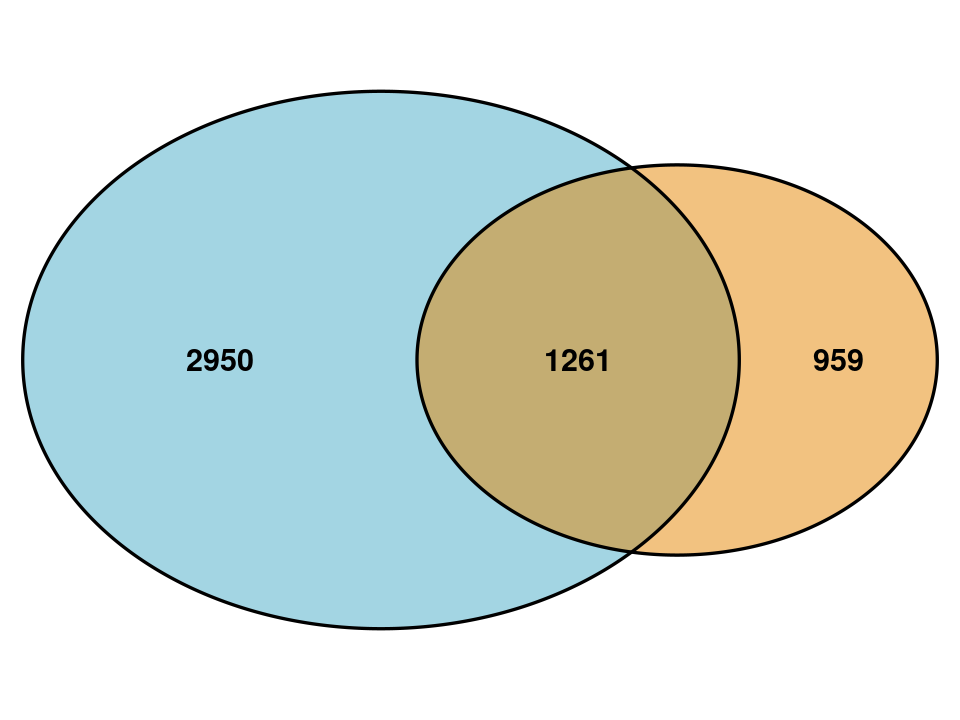

In [22]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(4211, 2220, 1261, 
                              fill = c("#46ACC8", "#E58601"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../figures/tri_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

png 
  2

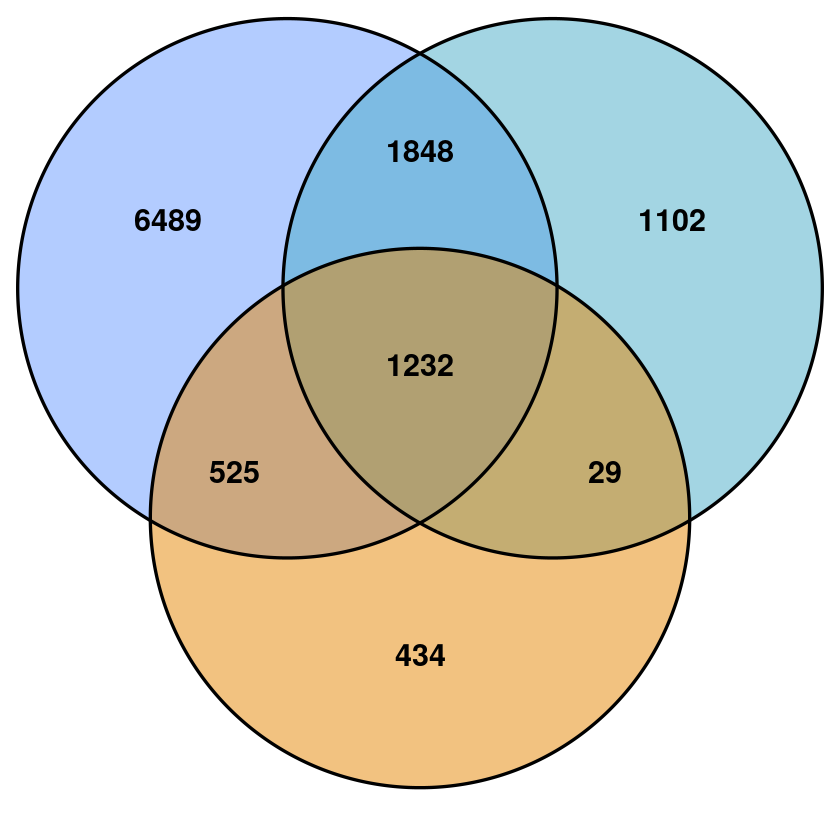

In [6]:
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(10094, 4211, 2220, 3080, 1261, 1757, 1232, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../figures/bulk_tri_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-2: sQTL, intron overlap**

In [2]:
tri1 <- fread("../../sqtl_new/results/tri1_perm_15hcp/sig_pheno.txt", data.table = F)
tri2 <- fread("../../sqtl_new/results/tri2_perm_10hcp/sig_pheno.txt", data.table = F)

In [3]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid))
length(unique(tri2$pid))
dim(tri1)
dim(tri2)

[1] 3338

[1] 14193

[1] 5348

[1] 14193    13

[1] 5348   13

png 
  2

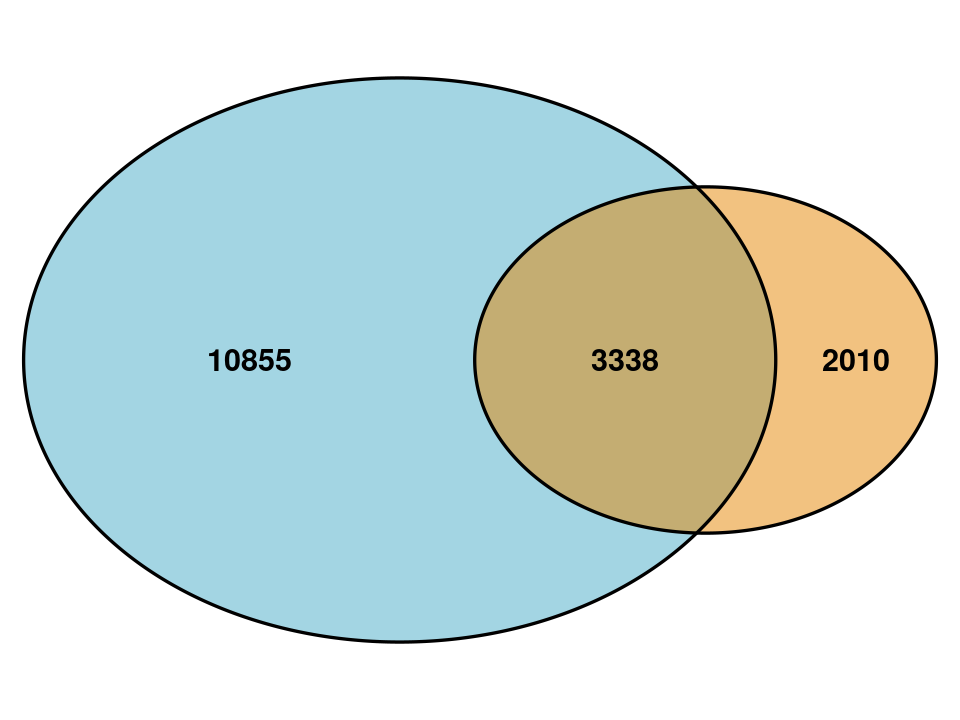

In [22]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(14193, 5348, 3338, 
                              fill = c("#46ACC8", "#E58601"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../sqtl_new/figures/tri_intron.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-3: sQTL, sGene overlap**

In [4]:
load("../../sqtl_new/leafviz_annot/all.introns.tested.RData")

In [24]:
head(pheno)

,ID,verdict,gene,ensemblID,transcripts,constitutive.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1:14829:14930:clu_7637_NA,cryptic_unanchored,WASH7P,ENSG00000227232.5_3,NA,0.5
2,1:14829:14970:clu_7637_NA,cryptic_unanchored,WASH7P,ENSG00000227232.5_3,NA,0.5
3,1:14829:15021:clu_7637_NA,cryptic_unanchored,WASH7P,ENSG00000227232.5_3,NA,0.5
4,1:14829:15796:clu_7637_NA,cryptic_threeprime,WASH7P,ENSG00000227232.5_3,.,0.0
5,1:15038:15796:clu_7637_NA,annotated,WASH7P,ENSG00000227232.5_3,ENST00000488147.1_2,0.5
6,1:15942:16607:clu_7638_NA,cryptic_threeprime,WASH7P,ENSG00000227232.5_3,.,0.0


In [5]:
tri1 <- tri1 %>% left_join(pheno, by = c("pid" = "ID"))
tri2 <- tri2 %>% left_join(pheno, by = c("pid" = "ID"))
head(tri1)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,verdict,gene,ensemblID,transcripts,constitutive.score
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,10:100137528:100143466:clu_20617_NA,3357,1.01909,523.446,108.613,rs7921146,49072,3.38406e-07,-0.622915,0.00039996,0.000400767,0.00816980,8.81907e-06,cryptic_unanchored,PYROXD2,ENSG00000119943.13_5,NA,0.33
2,10:100137528:100146958:clu_20617_NA,3357,1.04175,488.696,106.511,rs3750604,38052,3.67952e-07,-0.624487,0.00059994,0.000433388,0.00871203,1.07244e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00
3,10:100143573:100144704:clu_20617_NA,3333,1.04957,453.578,104.557,rs7923729,25891,8.12128e-07,-0.598002,0.00069993,0.001005450,0.01721800,1.20575e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00
4,10:100143625:100146958:clu_20617_NA,3332,1.03600,485.662,106.237,rs7921146,42975,1.57562e-07,-0.638626,0.00029997,0.000209189,0.00475732,1.04545e-05,novel annotated pair,PYROXD2,ENSG00000119943.13_5,ENST00000370575.5_3+ENST00000483923.5_2,0.67
5,10:100145024:100146958:clu_20617_NA,3334,1.03512,455.756,105.083,rs7921146,41576,1.44392e-06,-0.603343,0.00129987,0.001801960,0.02711200,1.10862e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00
6,10:100146466:100146958:clu_20617_NA,3332,1.06353,438.939,103.495,rs10883094,41639,2.33904e-06,-0.573179,0.00209979,0.002701160,0.03682140,1.34246e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00


In [26]:
length(unique(tri1$ensemblID))
length(unique(tri2$ensemblID))
length(unique(tri1$gene))
length(unique(tri2$gene))

[1] 5313

[1] 2319

[1] 5311

[1] 2319

In [23]:
sum(unique(tri1$ensemblID) == '.')
sum(unique(tri2$ensemblID) == '.')
sum(unique(tri1$gene) == '.')
sum(unique(tri2$ensemblID) == '.')

[1] 1

[1] 1

[1] 1

[1] 1

In [20]:
sum(pheno$gene == '.')

[1] 10043

In [27]:
sum(unique(tri1$ensemblID) %in% unique(tri2$ensemblID))

[1] 1763

png 
  2

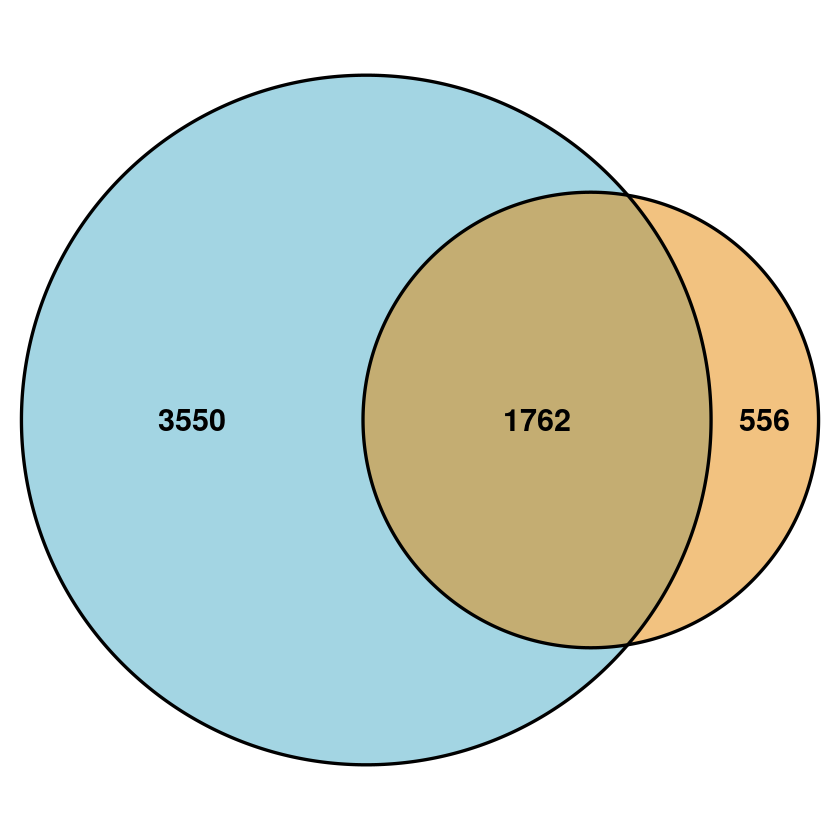

In [24]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(5312, 2318, 1762, 
                              fill = c("#46ACC8", "#E58601"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../sqtl_new/figures/tri_sgene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

### 3: h2
- Daniel ran GCTA
- SNP_h2 seems to be driven by trans_h2, which has funky bimodal distribution...N too small?
- 

In [2]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/Trimester_1_EUR_25_HPC_gene_filtered_1Mbase_window/output/results/all_variance.txt", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/Trimester_2_EUR_15_HPC_gene_filtered_1Mbase_window/output/results/all_variance.txt", data.table = F)

In [3]:
head(tri1_h2)

,ID,V_Cis,V_Trans,V_Res,V_Phe,Cis_h2,Trans_h2,SNP_h2,SE_V_Cis,SE_V_Trans,SE_V_Res,SE_V_Phe,SE_Cis_h2,SE_Trans_h2,SE_SNP_h2,P_val,Cis_SNPs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,ENSG00000000419,0.000254,0.000583,0.005754,0.006590,0.038493,0.088488,0.126981,0.001157,0.013210,0.013078,0.000926,0.175198,2.003616,1.988520,0.500000,5491
2,ENSG00000000457,0.000393,0.011690,0.000000,0.012083,0.032494,0.967503,0.999997,0.000679,0.030402,0.030155,0.001708,0.056845,2.492508,2.495755,0.158150,5825
3,ENSG00000000460,0.006330,0.008724,0.009974,0.025028,0.252903,0.348582,0.601485,0.004264,0.048948,0.048588,0.003713,0.154699,1.951655,1.945871,0.019091,6007
4,ENSG00000000938,0.021838,0.029455,0.104037,0.155330,0.140592,0.189627,0.330219,0.020678,0.312766,0.310579,0.022517,0.126652,2.011710,2.004562,0.128490,3196
5,ENSG00000000971,0.003460,0.346034,0.041863,0.391358,0.008842,0.884188,0.893030,0.035799,0.859545,0.851101,0.055237,0.091451,2.177287,2.176575,0.281490,3247
6,ENSG00000001036,0.000128,0.009115,0.008466,0.017709,0.007206,0.514717,0.521923,0.002442,0.037333,0.036973,0.002491,0.137868,2.099893,2.093156,0.500000,4151


In [4]:
tri1 <- tri1_h2 %>% inner_join(tri2_h2, by = "ID") %>% select(ID, Cis_h2.x, Trans_h2.x, SNP_h2.x)
tri2 <- tri2_h2 %>% inner_join(tri1_h2, by = "ID") %>% select(ID, Cis_h2.x, Trans_h2.x, SNP_h2.x)

In [5]:
h2 <- rbind(tri1, tri2)
h2$group <- c(rep("Trimester 1", nrow(tri1)), rep("Trimester 2", nrow(tri2)))

In [6]:
head(h2)

,ID,Cis_h2.x,Trans_h2.x,SNP_h2.x,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000000419,0.038493,0.088488,0.126981,Trimester 1
2,ENSG00000000457,0.032494,0.967503,0.999997,Trimester 1
3,ENSG00000000460,0.252903,0.348582,0.601485,Trimester 1
4,ENSG00000000938,0.140592,0.189627,0.330219,Trimester 1
5,ENSG00000000971,0.008842,0.884188,0.893030,Trimester 1
6,ENSG00000001036,0.007206,0.514717,0.521923,Trimester 1


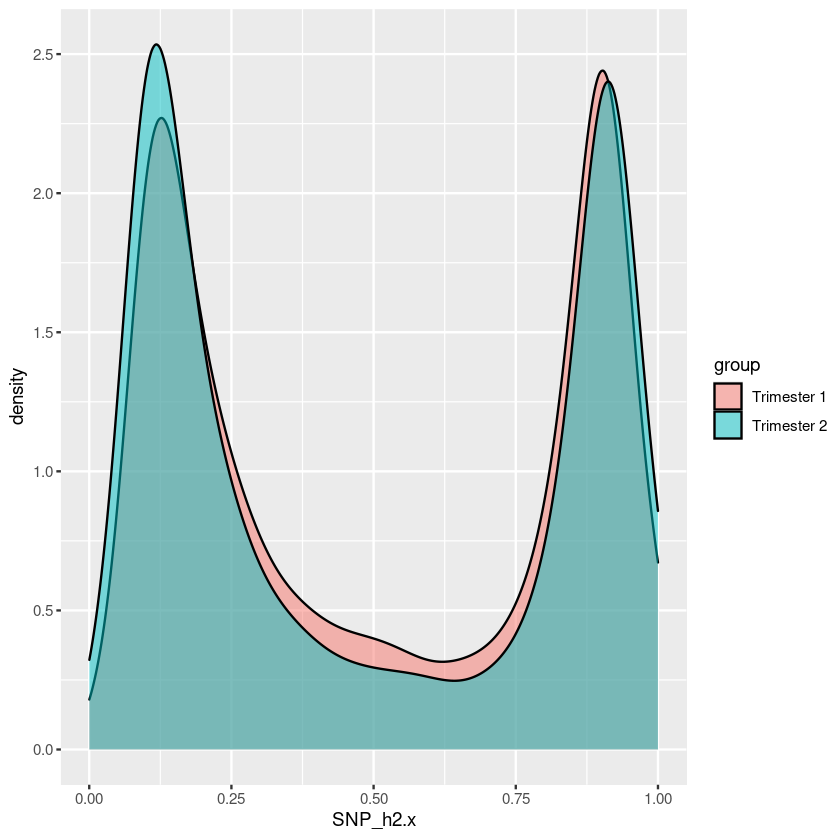

In [7]:
p <- ggplot(h2, aes(x = SNP_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

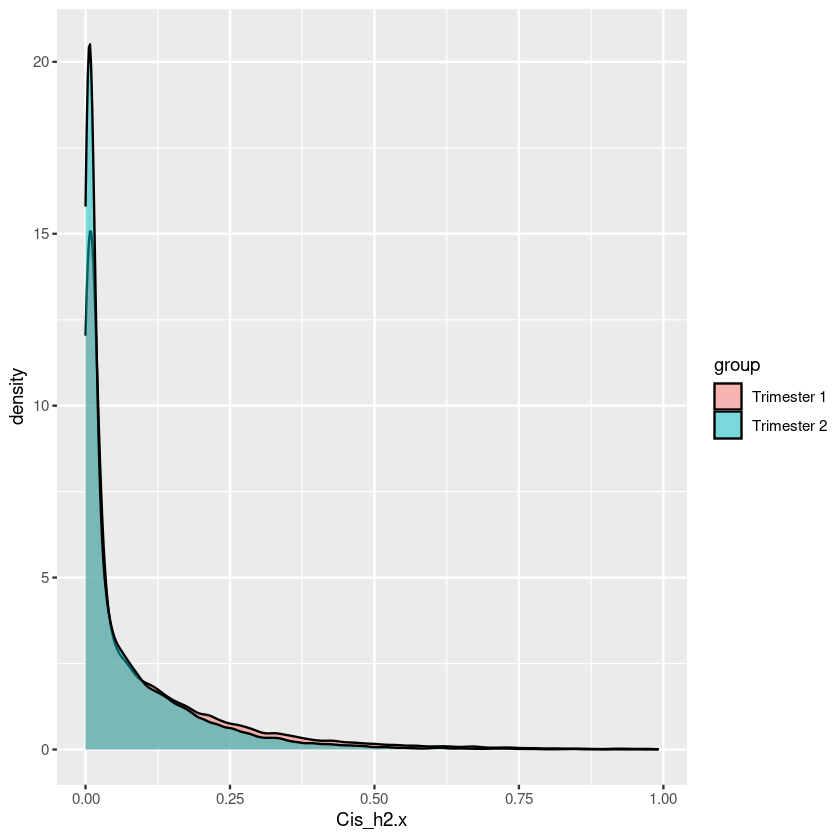

In [15]:
p <- ggplot(h2, aes(x = Cis_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

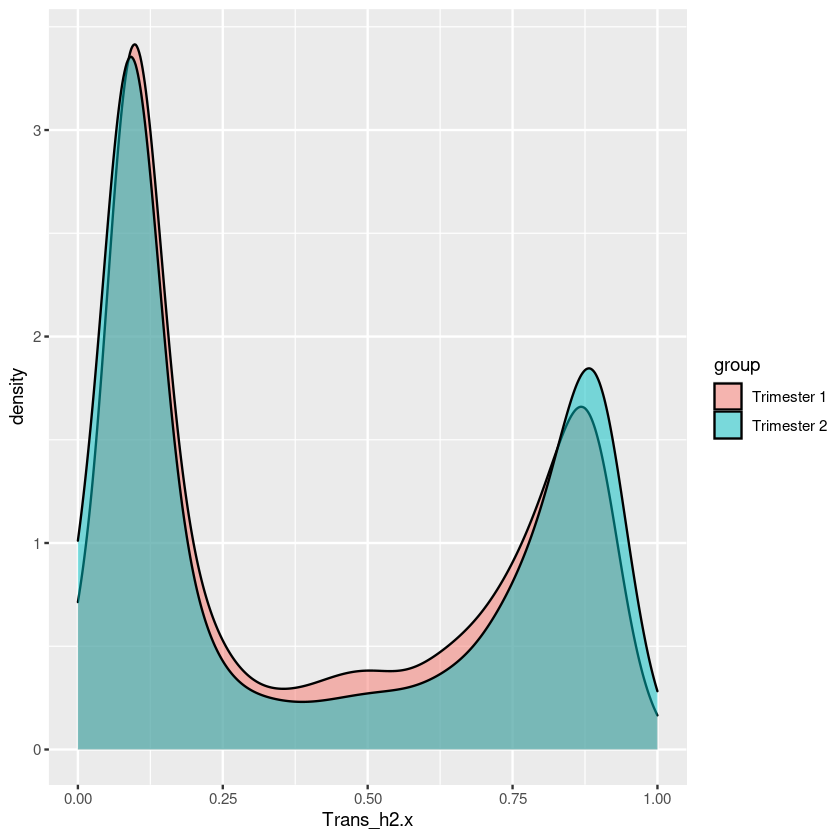

In [16]:
p <- ggplot(h2, aes(x = Trans_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

In [17]:
dim(tri1_h2)
dim(tri2_h2)

[1] 31523    17

[1] 31531    17

In [18]:
mean(tri1_h2$Cis_h2)
mean(tri2_h2$Cis_h2)
median(tri1_h2$Cis_h2)
median(tri2_h2$Cis_h2)

[1] 0.09872257

[1] 0.07390155

[1] 0.03183

[1] 0.02222

In [19]:
wilcox.test(tri1_h2$Cis_h2, tri2_h2$Cis_h2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$Cis_h2 and tri2_h2$Cis_h2
W = 543086462, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


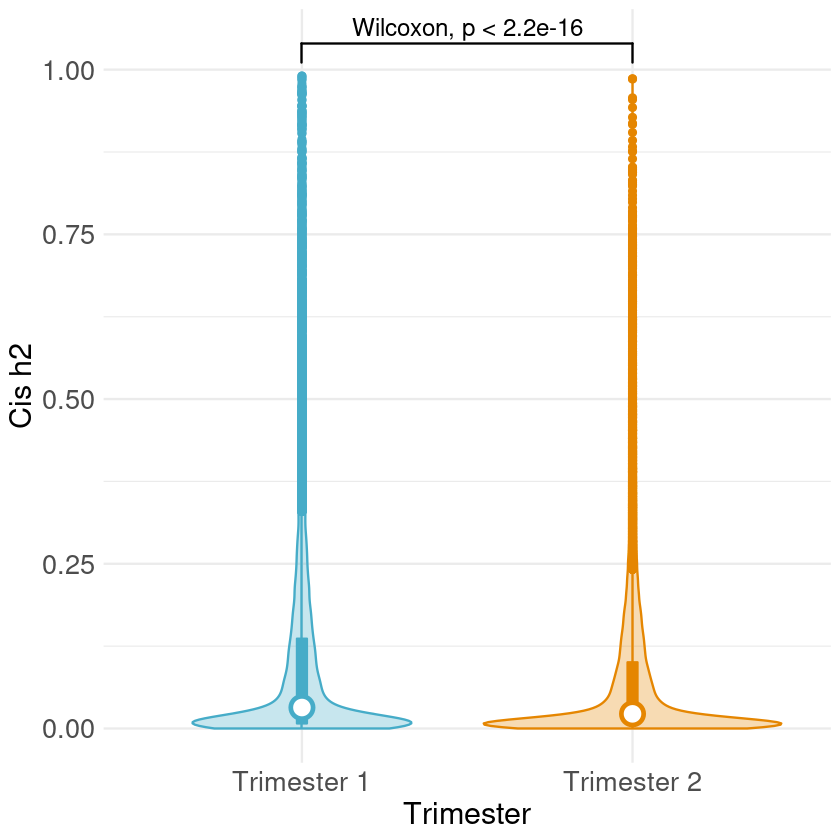

In [15]:
p <- ggplot(h2, aes(x = group, y = Cis_h2.x, fill = group)) +
    geom_violin(alpha = 0.3, trim = TRUE, aes(color = group)) +
    geom_boxplot(width = 0.03, aes(color = group)) +
    labs(x = "Trimester", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#46ACC8", "#E58601")) +
    scale_color_manual(values = c("#46ACC8", "#E58601")) +
    stat_summary(fun = median, aes(color = group), geom = "point", 
                         shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    geom_signif(
        comparisons = list(c("Trimester 1", "Trimester 2")),
        annotation = "Wilcoxon, p < 2.2e-16",
        textsize = 5
  )

p

In [16]:
ggsave("../figures/tri_cis_h2.pdf", width = 6, height = 6)

In [8]:
h2_scatter <- tri1 %>% inner_join(tri2, by = "ID")
head(h2_scatter)

,ID,Cis_h2.x.x,Trans_h2.x.x,SNP_h2.x.x,Cis_h2.x.y,Trans_h2.x.y,SNP_h2.x.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000419,0.038493,0.088488,0.126981,0.040520,0.061355,0.101875
2,ENSG00000000457,0.032494,0.967503,0.999997,0.081111,0.073336,0.154447
3,ENSG00000000460,0.252903,0.348582,0.601485,0.304154,0.073436,0.377590
4,ENSG00000000938,0.140592,0.189627,0.330219,0.006086,0.142409,0.148495
5,ENSG00000000971,0.008842,0.884188,0.893030,0.018635,0.900914,0.919549
6,ENSG00000001036,0.007206,0.514717,0.521923,0.013204,0.859694,0.872899


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



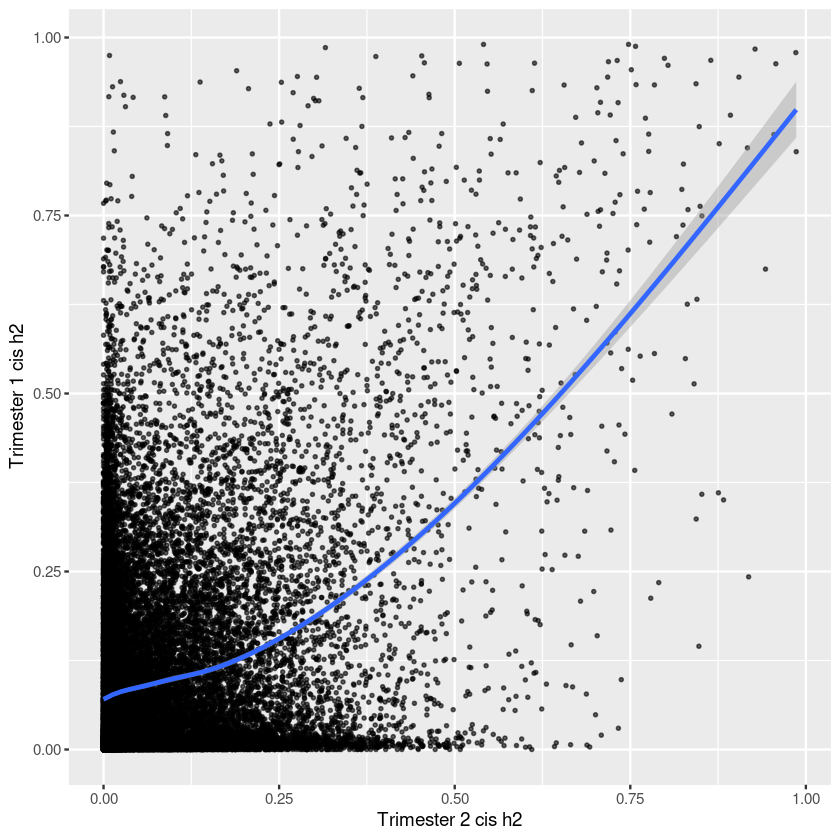

In [12]:
p <- ggplot(h2_scatter, aes(y = Cis_h2.x.x, x = Cis_h2.x.y)) +
    geom_point(alpha = 0.6, size = 0.5) +
    geom_smooth() +
    labs(x = "Trimester 2 cis h2", y = "Trimester 1 cis h2")
p